# Building a Recurrent Neural Network

## Sentiment Analysis
In this project, we will build a Long Short-term Memory (LSTM) neural network to solve a binary sentiment analysis problem.

For this, we'll use the “IMDB Movie Review Dataset" available on Keras. It includes 50000 highly polarized movie reviews categorized as positive or negative.



# Tekrarlayan Bir Sinir Ağı Oluşturmak

## Duygu Analizi
Bu projede, ikili duygu analizi problemini çözmek için Uzun Kısa Süreli Bellek (LSTM) sinir ağı oluşturacağız.

Bunun için Keras'ta bulunan “IMDB Film İnceleme Veri Kümesini” kullanacağız. Olumlu veya olumsuz olarak kategorize edilmiş 50.000 yüksek derecede kutuplaşmış film incelemesini içerir.

## Importing the required libraries
We'll start with importing required libraries.

📌 Use the keyword "import".


## Gerekli kitaplıkları içe aktarma
Gerekli kütüphaneleri içe aktararak başlayacağız.

📌 "İçe aktar" anahtar kelimesini kullanın.

In [1]:
# Import TensorFlow
import tensorflow as tf

# Import NumPy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Dataset
Let's download the IMDB dataset which is included in Keras, and assign it to the corresponding variables *X_train*, *y_train*, *X_test*, and *y_test*. We want to include the most frequently used 10000 words, so we specify 10000 for the num_words parameter.

📌 Use the datasets.imdb.load_data() function of the Keras.

## Veri Kümesi
Keras'ın içerdiği IMDB veri setini indirelim ve onu ilgili *X_train*, *y_train*, *X_test* ve *y_test* değişkenlerine atayalım. En sık kullanılan 10000 kelimeyi dahil etmek istiyoruz bu yüzden num_words parametresi için 10000 belirtiyoruz.

📌 Keras'ın datasets.imdb.load_data() fonksiyonunu kullanın.

In [33]:
# Download the IMDB dataset included in Keras
# Set the parameter num_words to 10000
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

Before we move on, we can print a single sample to see what the data looks like.

📌 Use the print() function for this.

Devam etmeden önce verilerin neye benzediğini görmek için tek bir örnek yazdırabiliriz.

📌 Bunun için print() fonksiyonunu kullanın.

In [34]:
# Print a sample
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Then, we print the the number of samples in the X_train and X_test datasets to see how the dataset is distributed.

📌 Use f-strings for this.

Daha sonra veri setinin nasıl dağıldığını görmek için X_train ve X_test veri setlerindeki örnek sayısını yazdırıyoruz.

📌Bunun için f-stringleri kullanın.

In [19]:
# Print the number of samples
print (f"X_train:{len(X_train)}")
print (f"X_test:{len(X_test)}")

X_train:25000
X_test:25000


# Preprocessing
### Concatenate

To split the dataset with 80-10-10 ratio, we'll first concatenate train and test datasets to create one big dataset.

📌 Use contenate() function of the NumPy library for this.

# Ön işleme
### Birleştir

Veri kümesini 80-10-10 oranına bölmek için öncelikle eğitim ve test veri kümelerini birleştirip büyük bir veri kümesi oluşturacağız.

📌 Bunun için NumPy kütüphanesinin contenate() fonksiyonunu kullanın.

In [35]:
# Concatenate X_train and X_test and assing it to a variable X
X= np.concatenate((X_train,X_test),axis =0)

# Concatenate y_train and y_test and assing it to a variable y
y= np.concatenate((y_train,y_test),axis =0)

###Padding

Since all reviews are at different lengths, we'll use padding to make all of them same length.

📌 Use preprocessing.sequence.pad_sequences() function for this.

###Dolgu malzemesi

Tüm incelemeler farklı uzunluklarda olduğundan, hepsini aynı uzunlukta yapmak için dolgu kullanacağız.

📌 Bunun için preprocessing.sequence.pad_sequences() fonksiyonunu kullanın.

In [36]:
# Pad all reviews in the X dataset to the length maxlen=1024
X=tf.keras.preprocessing.sequence.pad_sequences(X,maxlen=1024)

### Splitting

Now, split X and y into train, validation and test dataset and assign those to corresponding values.

📌 You can use list slicing methods for this.

📌 For this dataset, a 80-10-10 split corresponds to 40000 - 10000 - 10000 number of samples relatively.


### Bölme

Şimdi X ve y'yi eğitim, doğrulama ve test veri kümesine bölün ve bunları karşılık gelen değerlere atayın.

📌Bunun için liste dilimleme yöntemlerini kullanabilirsiniz.

📌Bu veri seti için 80-10-10'luk bir bölünme göreceli olarak 40000 - 10000 - 10000 örnek sayısına karşılık gelmektedir.


In [37]:
# Create the training datasets
X_train = X[:40000]
y_train = y[:40000]


# Create the validation datasets
X_val = X[40000:45000]
y_val = y[40000:45000]
# Create the test datasets
X_test = X[45000:50000]
y_test = y[45000:50000]

To check if that worked out, print the number of samples in each dataset again.

📌 Use f-strings for this.


Bunun işe yarayıp yaramadığını kontrol etmek için her veri kümesindeki örnek sayısını tekrar yazdırın.

📌Bunun için f-stringleri kullanın.

In [38]:
# Print the number of samples
print (f"X_train:{len(X_train)}")
print (f"y_train:{len(y_train)}")

print (f"X_val:{len(X_val)}")
print (f"y_val:{len(y_val)}")


print (f"X_test:{len(X_test)}")
print (f"y_test:{len(y_test)}")



X_train:40000
y_train:40000
X_val:5000
y_val:5000
X_test:5000
y_test:5000


## Constructing the neural network

That was it for the preprocessing of the data! 

Now we can create our model. First, we start by creating a model object using the Sequential API of Keras.

📌 Use tf.keras.Sequential() to create a model object

## Sinir ağının oluşturulması

Verilerin ön işlenmesi bu kadardı!

Artık modelimizi oluşturabiliriz. Öncelikle Keras'ın Sequential API'sini kullanarak bir model nesnesi oluşturarak başlıyoruz.

📌 Bir model nesnesi oluşturmak için tf.keras.Sequential() öğesini kullanın

In [39]:
model = tf.keras.Sequential()

### Embedding Layer

For the first layer, we add an embedding layer.

📌 Use tf.keras.layers.Embedding() for the embedding layer.

📌 Use .add() method of the object to add the layer.

### Gömme Katmanı
​
İlk katman için bir gömme katmanı ekliyoruz.
​
📌 Gömme katmanı için tf.keras.layers.Embedding() işlevini kullanın.
​
📌 Katmanı eklemek için nesnenin .add() yöntemini kullanın.

In [40]:
# Add an embedding layer and a dropout
model.add(tf.keras.layers.Embedding(input_dim=10000,output_dim=256))
model.add(tf.keras.layers.Dropout(0.7))

Then, we add a LSTM layer and a dense layer; each with a dropout.

📌 Use tf.keras.layers.LSTM() and tf.keras.layers.Dense() to create the layers.

📌 Use .add() method of the object to add the layer.


Daha sonra bir LSTM katmanı ve bir yoğun katman ekliyoruz; her biri bir okulu bırakmış durumda.

📌 Katmanları oluşturmak için tf.keras.layers.LSTM() ve tf.keras.layers.Dense()'yi kullanın.

📌 Katmanı eklemek için nesnenin .add() yöntemini kullanın.

In [41]:
# Add a LSTM layer with dropout
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dropout(0.7))


# Add a Dense layer with dropout
model.add(tf.keras.layers.Dense(128,activation= "relu"))
model.add(tf.keras.layers.Dropout(0.7))


### Output layer

As the last part of our neural network, we add the output layer. The number of nodes will be one since we are making binary classification. We'll use the sigmoid activation function in the output layer.

📌 Use tf.keras.layers.Dense() to create the layer.

📌 Use .add() method of the object to add the layer.

### Çıkış katmanı

Sinir ağımızın son parçası olarak çıktı katmanını ekliyoruz. İkili sınıflandırma yaptığımız için düğüm sayısı bir olacaktır. Çıkış katmanında sigmoid aktivasyon fonksiyonunu kullanacağız.

📌 Katmanı oluşturmak için tf.keras.layers.Dense() öğesini kullanın.

📌 Katmanı eklemek için nesnenin .add() yöntemini kullanın.

In [42]:
# Add the output layer
model.add(tf.keras.layers.Dense(1,activation ="sigmoid"))

### Optimizer

Now we have the structure of our model. To configure the model for training, we'll use the *.compile()* method. Inside the compile method, we have to define the following:
*   "Adam" for optimizer
*   "Binary Crossentropy" for the loss function


📌 Construct the model with the .compile() method.

Optimize Edici
Artık modelimizin yapısına sahibiz. Modeli eğitim amacıyla yapılandırmak için .compile() yöntemini kullanacağız. Derleme yönteminin içinde aşağıdakileri tanımlamamız gerekir:

Optimize edici için "Adam"
Kayıp fonksiyonu için "İkili Krosentropi"
📌Modeli .compile() yöntemiyle oluşturun.

In [43]:
model.compile(optimizer="adam", loss="binary_crossentropy",metrics =["accuracy"])

## Training the model

It's time to train the model. We'll give the X_train and y_train datasets as the first two arguments. These will be used for training. And with the *validation_data* parameter, we'll give the X_val and y_val as a tuple.

📌 Use .fit() method of the model object for the training.

## Modeli eğitme

Modeli eğitmenin zamanı geldi. İlk iki argüman olarak X_train ve y_train veri kümelerini vereceğiz. Bunlar eğitim amaçlı kullanılacak. Ve *validation_data* parametresi ile X_val ve y_val değerlerini tuple olarak vereceğiz.

📌 Eğitim için model nesnesinin .fit() yöntemini kullanın.

In [44]:
# Train the model for 5 epochs
results= model.fit(X_train,y_train,epochs = 5,validation_data=(X_val,y_val))

Epoch 1/5
1250/1250 [==============================] - 31508s 25s/step - loss: 0.5064 - accuracy: 0.7519 - val_loss: 0.3495 - val_accuracy: 0.8460
Epoch 2/5
1250/1250 [==============================] - 10701s 9s/step - loss: 0.3515 - accuracy: 0.8633 - val_loss: 0.2845 - val_accuracy: 0.8858
Epoch 3/5
1250/1250 [==============================] - 11884s 10s/step - loss: 0.2642 - accuracy: 0.9019 - val_loss: 0.2766 - val_accuracy: 0.8870
Epoch 4/5
1250/1250 [==============================] - 13360s 11s/step - loss: 0.2254 - accuracy: 0.9176 - val_loss: 0.2806 - val_accuracy: 0.8930
Epoch 5/5
1250/1250 [==============================] - 48849s 39s/step - loss: 0.1866 - accuracy: 0.9347 - val_loss: 0.2736 - val_accuracy: 0.8846


### Visualize the results

After the model is trained, we can create a graph to visualize the change of loss over time. Results are held in:
* results.history["loss"]
* results.history["val_loss"]

📌 Use plt.show() to display the graph.


### Sonuçları görselleştirin
​
Model eğitildikten sonra zaman içindeki kaybın değişimini görselleştirmek için bir grafik oluşturabiliriz. Sonuçlar şurada tutulur:
* sonuçlar.geçmiş["kayıp"]
* sonuçlar.geçmiş["val_loss"]
​
📌 Grafiği görüntülemek için plt.show() işlevini kullanın.

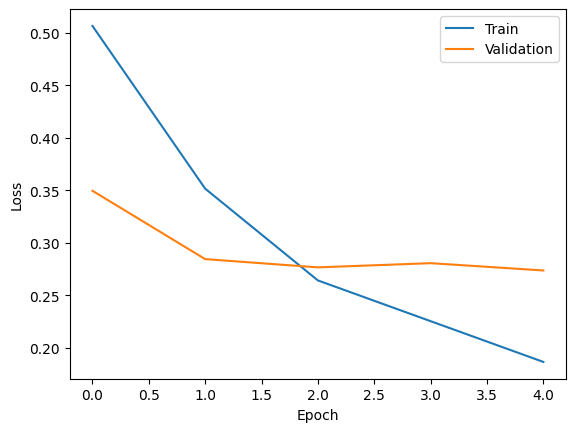

In [49]:
# Plot the the training loss
plt.plot(results.history["loss"],label ="Train")

# Plot the the validation loss
plt.plot(results.history["val_loss"],label="Validation")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

Now, do the same thing for accuracy.

📌 Accuracy scores can be found in:
* results.history["accuracy"]
* results.history["val_accuracy"]



Şimdi doğruluk için aynı şeyi yapın.

📌 Doğruluk puanlarını şurada bulabilirsiniz:
* sonuçlar.geçmiş["doğruluk"]
* sonuçlar.geçmiş["val_accuracy"]

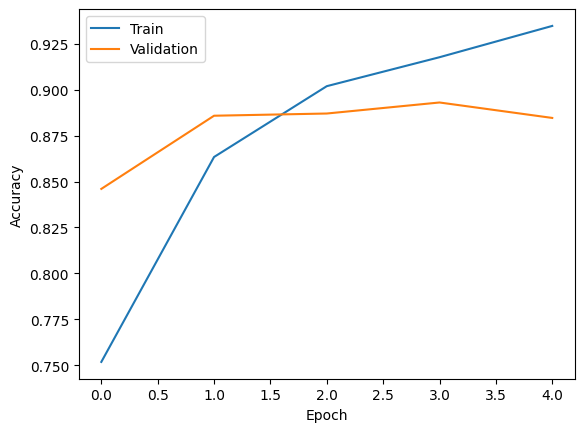

In [51]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"],label="Train")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"],label="Validation")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()

## Performance evaluation

Let's use the test dataset that we created to evaluate the performance of the model.

📌 Use test_on_batch() method with test dataset as parameter.



## Performans değerlendirmesi

Modelin performansını değerlendirmek için oluşturduğumuz test veri setini kullanalım.

📌 Test veri kümesini parametre olarak kullanarak test_on_batch() yöntemini kullanın.

In [52]:
# Evaluate the performance
model.evaluate(X_test,y_test)

157/157 [==============================] - 175s 1s/step - loss: 0.2674 - accuracy: 0.8888


[0.2673785984516144, 0.8888000249862671]

### Try a prediction

Next, we take a sample and make a prediction on it.

📌 Reshape the review to (1, 1024).

📌 Use the .prediction() method of the model object.


### Bir tahmin deneyin

Daha sonra bir örnek alıyoruz ve onun üzerinde bir tahmin yapıyoruz.

📌 İncelemeyi (1, 1024) olarak yeniden şekillendirin.

📌 Model nesnesinin .prediction() yöntemini kullanın.

In [ ]:
# Make prediction on the reshaped sample
prediction_result =model.predict(X_test[789].reshape(1,1024))

In [ ]:
print(f"label: {y_test[789]} -- Prediction {prediction_result}")